# Task 3 - Qiskit Aer Simulator

Tasks 1 and 2 only involve visualizing the states and the circuits using Qiskit.
To view the results of measurements, we need a simulator to run those circuits. Qiskit Aer is a powerful simulator for that matter.

In [29]:
# Add imports here, no code other than imports in this cell
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

In [2]:
# Task 3.1 - Create a Bell pair circuit. Add measurements to all qubits.
# Take shots=10,000 and use all methods ('statevector', 'stabilizer', 'extended_stabilizer', 'density_matrix', 'matrix_product_state') to run the circuit and get the counts.
# Plot the counts in one histogram.
# Note: Some methods may take longer time to run.

circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0, 1)
circ.measure([0, 1], [0, 1])

backend = AerSimulator()
compiled = transpile(circ, backend)
job_sim = backend.run(compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(compiled)
print(counts)

{'11': 505, '00': 519}


In [12]:
# Task 3.2 - Create a Cat state 1/sqrt(2)(|001> - |110>). Visualize the state using a qsphere.

circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)
circ.x(0)

print(circ)

sv = Statevector.from_int(0, 2**3)
sv = sv.evolve(circ)
sv.draw('latex')

     ┌───┐          ┌───┐
q_0: ┤ H ├──■────■──┤ X ├
     └───┘┌─┴─┐  │  └───┘
q_1: ─────┤ X ├──┼───────
          └───┘┌─┴─┐     
q_2: ──────────┤ X ├─────
               └───┘     
c: 3/════════════════════
                         


<IPython.core.display.Latex object>

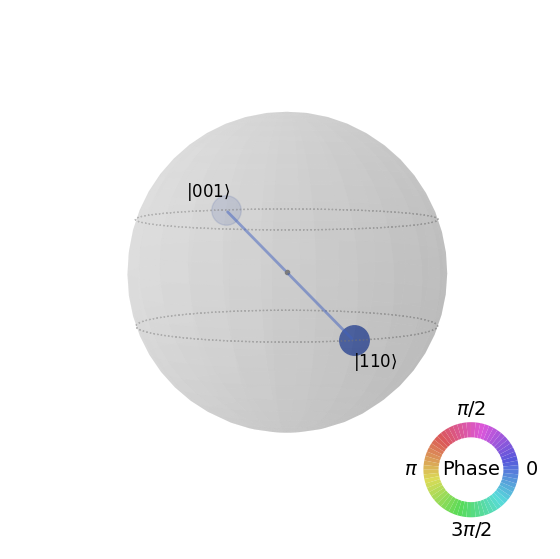

In [13]:
sv.draw('qsphere')

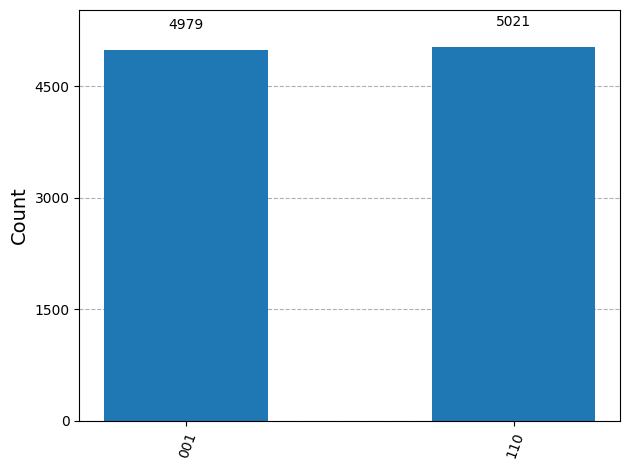

In [30]:
# Task 3.3 - Plot the histogram of the results of Task 3.2 after adding measurements to all qubits
# and running the circuit with shots=10,000 using density_matrix method.

circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)
circ.x(0)
circ.measure([0, 1, 2], [0, 1, 2])

backend = AerSimulator(method='density_matrix')
compiled = transpile(circ, backend)
job_sim = backend.run(compiled, shots=10_000)
result_sim = job_sim.result()
counts = result_sim.get_counts(compiled)

plot_histogram(counts)